<a href="https://colab.research.google.com/github/yongbin02/AI/blob/main/5%EC%A3%BC%EC%B0%A8/BMI_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [48]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI/AI-diabetes/data/diabetes.csv").dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 데이터 전처리

In [49]:
# null 값 탐지

df.info()
# null 값이 존재하지 않음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [50]:
# 데이터 값이 0인 부분 탐지
# BMI, Glucose, BloodPressure 등이 0이면 인간은 생존할 수 없음 -> 데이터 오류일 가능성 있음

# 0 값을 확인할 열 목록
cols_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("\n각 열에 포함된 0의 개수:")
# 각 열에서 값이 0인 데이터의 개수 체크
print((df[cols_to_check] == 0).sum())


# 위 열들 중 하나라도 0을 포함하는 모든 행 검색
zero_data_rows = df[(df['Glucose'] == 0) |
                    (df['BloodPressure'] == 0) |
                    (df['SkinThickness'] == 0) |
                    (df['Insulin'] == 0) |
                    (df['BMI'] == 0)]

print("\n하나 이상의 0 값을 포함하는 행들 (일부):")
print(zero_data_rows.head())


각 열에 포함된 0의 개수:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

하나 이상의 0 값을 포함하는 행들 (일부):
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
5            5      116             74              0        0  25.6   
7           10      115              0              0        0  35.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
5                     0.201   30        0  
7                     0.134   29        0  


In [51]:
# 0 값을 해당 열의 평균값으로 대체

cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_replace:
    # 0 값을 NaN으로 바꾼 후, 해당 열의 평균값으로 채움
    df[col] = df[col].replace(0, np.nan)
    mean_val = df[col].mean()
    df[col] = df[col].fillna(mean_val)

## 상관관계 분석 및 시각화

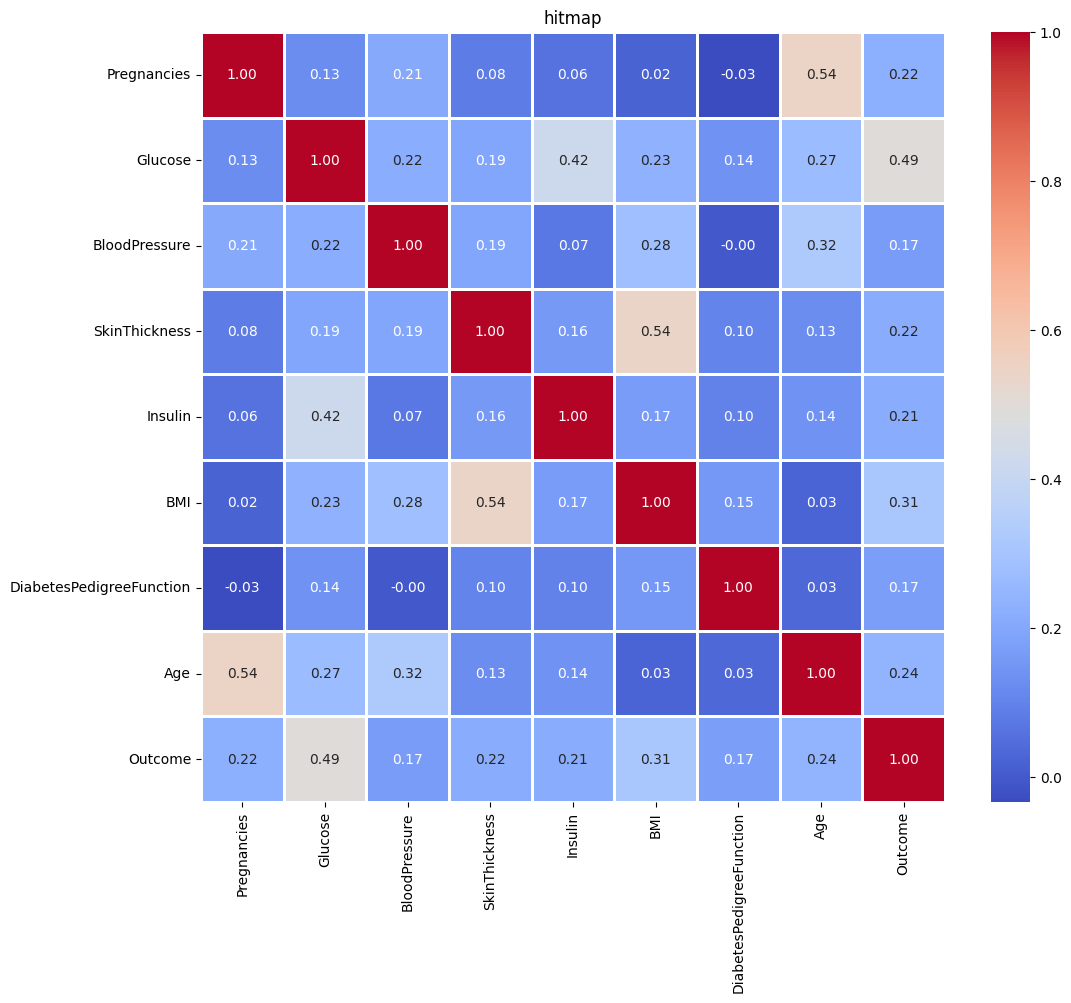

In [52]:
# 각 변수 간의 상관관계를 계산
correlation_matrix = df.corr()

# 히트맵을 사용하여 상관관계를 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.title('hitmap')
plt.show()

## 특성 및 타겟 변수 설정 및 분리

In [53]:
# BMI 회귀 문제이므로 -> BMI를 제외한 열을 피처로 사용

X = df.drop('BMI', axis=1)
y = df['BMI']

In [54]:
# 훈련 데이터와 테스트 데이터로 분리

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 스케일링

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 딥러닝 모델

In [56]:
model = Sequential([
    # 입력층: 입력 특성의 수에 맞춰 설정
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    # 과적합 방지를 위한 드롭아웃
    Dropout(0.2),
    # 은닉층
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    # 출력층: BMI 값을 예측하는 회귀 문제이므로 1개의 노드로 설정
    Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
# 모델 컴파일 설정

# 회귀 문제에 적합한 'mean_squared_error'와 'mae' metrics 사
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae']
    )

## 모델 훈련

In [58]:
print("\n모델 훈련 시작...")
history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2, # 훈련 데이터 중 20%를 검증 데이터로 사용
    epochs= 100,           # 전체 데이터셋을 300번 반복 학습
    batch_size=32,        # 한 번에 32개씩 데이터를 묶어 학습
    verbose=0
)
print("모델 훈련 완료.")


모델 훈련 시작...
모델 훈련 완료.


## 모델 평가

In [59]:
print("\n테스트 데이터셋으로 모델 평가:")
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test Loss (MSE): {loss:.4f}')
print(f'Test Mean Absolute Error (MAE): {mae:.4f}')


테스트 데이터셋으로 모델 평가:
Test Loss (MSE): 40.4663
Test Mean Absolute Error (MAE): 4.5749


## 예측결과 확인

In [60]:
predictions = model.predict(X_test_scaled).flatten() # 2D 배열을 1D로 변환

# 실제 값과 예측 값을 비교하여 출력
results = pd.DataFrame({'실제 BMI': y_test, '예측 BMI': predictions})
print("\n예측 결과 샘플:")
print(results.head(10))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

예측 결과 샘플:
     실제 BMI     예측 BMI
668    34.0  29.326450
324    35.7  32.598564
624    30.8  29.369844
690    24.6  31.015858
473    29.9  32.084232
204    37.7  29.282658
97     20.4  25.494183
336    33.8  28.401489
568    31.3  29.477232
148    33.7  29.418716


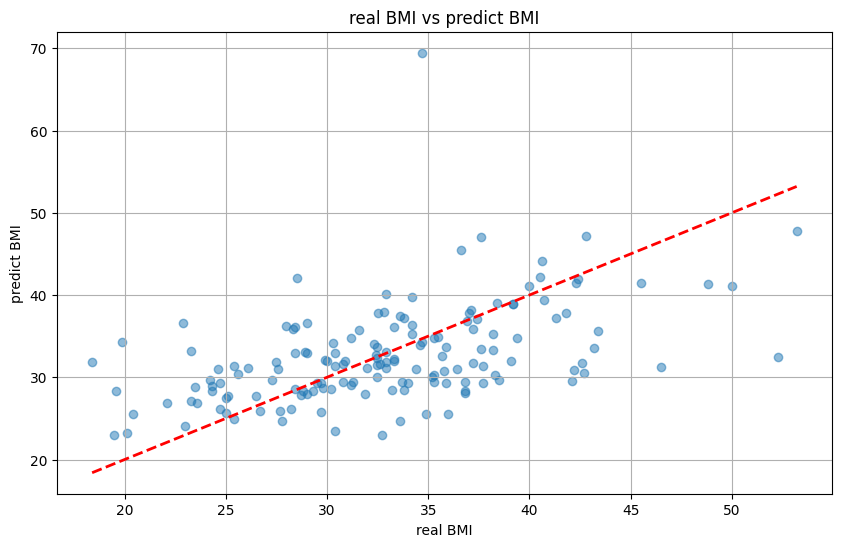

In [61]:
# 예측 결과 시각화

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('real BMI')
plt.ylabel('predict BMI')
plt.title('real BMI vs predict BMI')
plt.grid(True)
plt.show()